# IRIS - Connection I
---
![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [10]:
tr_x_l, tr_x_w = np.array(tr_x_l), np.array(tr_x_w)

In [11]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [12]:
te_x_l, te_x_w = np.array(te_x_l), np.array(te_x_w)

In [13]:
te_x_l.shape, te_x_w.shape

((30, 2), (30, 2))

## One-hot Encoding

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
len_y = len(np.unique(train_y))

In [16]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)


In [17]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [18]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [22]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [20]:
# %pip install pydot

Note: you may need to restart the kernel to use updated packages.


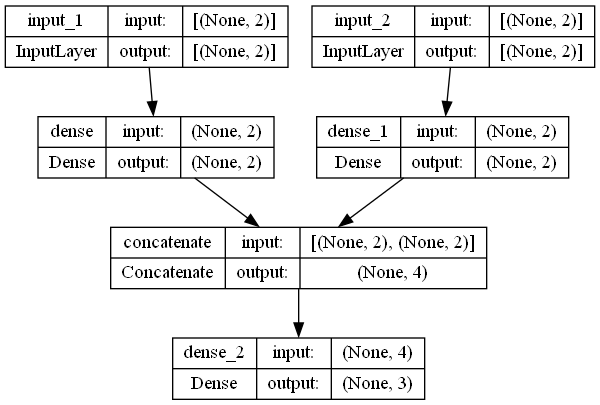

In [21]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [26]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [27]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3043 - accuracy: 0.9510 - val_loss: 0.2936 - val_accuracy: 0.9444
Epoch 2/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.3036 - accuracy: 0.9510 - val_loss: 0.2922 - val_accuracy: 0.9444
Epoch 3/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.3024 - accuracy: 0.9510 - val_loss: 0.2906 - val_accuracy: 0.9444
Epoch 4/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.3015 - accuracy: 0.9510 - val_loss: 0.2889 - val_accuracy: 0.9444
Epoch 5/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3002 - accuracy: 0.9510 - val_loss: 0.2873 - val_accuracy: 0.9444
Epoch 6/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.2991 - accuracy: 0.9510 - val_loss: 0.2854 - val_accuracy: 0.9444
Epoch 7/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2982 - accuracy: 0.9412 - val_loss: 0.2837 - val_accuracy: 0.9444
Epoch 8/1000


---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.2, random_state = 2023)

## **length끼리, width끼리**

In [5]:
x_train_len = x_train.loc[ : , ['sepal length (cm)', 'petal length (cm)']]
x_test_len = x_test.loc[ : , ['sepal length (cm)', 'petal length (cm)']]

x_train_wid = x_train.loc[:, ['sepal width (cm)', 'petal width (cm)']]
x_test_wid = x_test.loc[:, ['sepal width (cm)', 'petal width (cm)']]

## One-hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
len_y = len(set(y_train))

In [8]:
y_train = to_categorical(y_train, len_y)
y_test = to_categorical(y_test, len_y)

## Modeling : multi-input & Concatenate layer

In [9]:
# 패키지 선언
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
x_train_len.shape, y_train.shape

((120, 2), (120, 3))

In [11]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기: input 2개
il_l = Input(shape = (2, ), name = 'input_length')
hl_l = Dense(2, activation = relu, name = 'hidden_lenght')(il_l)

il_w = Input(shape = (2, ), name = 'input_width')
hl_w = Dense(2, activation = relu, name = 'hidden_width')(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation = softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss = categorical_crossentropy,
              metrics = ['accuracy'],
              optimizer = Adam())

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_length (InputLayer)      [(None, 2)]          0           []                               
                                                                                                  
 input_width (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 hidden_lenght (Dense)          (None, 2)            6           ['input_length[0][0]']           
                                                                                                  
 hidden_width (Dense)           (None, 2)            6           ['input_width[0][0]']            
                                                                                              

## 모델 시각화

In [12]:
plot_model(model, show_shapes=True)

NameError: name 'plot_model' is not defined

## 학습 시켜보기!

In [13]:
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 10,
                   verbose = 1,
                   restore_best_weights = True)

In [14]:
model.fit([x_train_len, x_train_wid], y_train,
          validation_split = 0.2,
          epochs = 1000,
          verbose = 1,
          callbacks = [es])

Epoch 1/1000
3/3 [==============================] - 1s 141ms/step - loss: 1.6018 - accuracy: 0.3125 - val_loss: 1.4972 - val_accuracy: 0.3333
Epoch 2/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.5891 - accuracy: 0.3125 - val_loss: 1.4860 - val_accuracy: 0.3333
Epoch 3/1000
3/3 [==============================] - 0s 24ms/step - loss: 1.5767 - accuracy: 0.3125 - val_loss: 1.4750 - val_accuracy: 0.3333
Epoch 4/1000
3/3 [==============================] - 0s 24ms/step - loss: 1.5645 - accuracy: 0.3125 - val_loss: 1.4641 - val_accuracy: 0.3333
Epoch 5/1000
3/3 [==============================] - 0s 23ms/step - loss: 1.5526 - accuracy: 0.3125 - val_loss: 1.4532 - val_accuracy: 0.3333
Epoch 6/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.5407 - accuracy: 0.3125 - val_loss: 1.4423 - val_accuracy: 0.3333
Epoch 7/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.5283 - accuracy: 0.3125 - val_loss: 1.4317 - val_accuracy: 0.3333
Epoch 8/1000

In [15]:
y_pred = model.predict([x_test_len, x_test_wid])


1/1 [==============================] - 0s 83ms/step


In [16]:
print(y_test[:5])
print(y_pred[:5])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0.00454288 0.29239476 0.70306236]
 [0.01831339 0.58309084 0.39859584]
 [0.01879176 0.58925027 0.39195797]
 [0.00786955 0.39274287 0.5993876 ]
 [0.01610251 0.55241346 0.43148398]]


In [12]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기: input 2개
il_l = Input(shape = (2, ), name = 'input_length')
hl_l = Dense(32, activation = relu, name = 'hidden_lenght')(il_l)

il_w = Input(shape = (2, ), name = 'input_width')
hl_w = Dense(32, activation = relu, name = 'hidden_width')(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation = softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss = categorical_crossentropy,
              metrics = ['accuracy'],
              optimizer = Adam())

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_length (InputLayer)      [(None, 2)]          0           []                               
                                                                                                  
 input_width (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 hidden_lenght (Dense)          (None, 32)           96          ['input_length[0][0]']           
                                                                                                  
 hidden_width (Dense)           (None, 32)           96          ['input_width[0][0]']            
                                                                                              

In [13]:
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 10,
                   verbose = 1,
                   restore_best_weights = True)

In [14]:
model.fit([x_train_len, x_train_wid], y_train,
          validation_split = 0.2,
          epochs = 1000,
          verbose = 1,
          callbacks = [es])

Epoch 1/1000
3/3 [==============================] - 1s 116ms/step - loss: 2.0502 - accuracy: 0.3125 - val_loss: 1.9097 - val_accuracy: 0.3333
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.8739 - accuracy: 0.3125 - val_loss: 1.7420 - val_accuracy: 0.3333
Epoch 3/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.7152 - accuracy: 0.3125 - val_loss: 1.5941 - val_accuracy: 0.3333
Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.5634 - accuracy: 0.3125 - val_loss: 1.4702 - val_accuracy: 0.3333
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.4463 - accuracy: 0.3125 - val_loss: 1.3698 - val_accuracy: 0.3333
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.3500 - accuracy: 0.3125 - val_loss: 1.2923 - val_accuracy: 0.3333
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.2763 - accuracy: 0.2500 - val_loss: 1.2347 - val_accuracy: 0.0833
Epoch 8/1000

In [16]:
y_pred = model.predict([x_test_len, x_test_wid])

1/1 [==============================] - 0s 214ms/step


In [17]:
print(y_test[:5])
print(y_pred[:5])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[6.4944275e-06 6.8442677e-03 9.9314922e-01]
 [3.1120039e-03 9.8280990e-01 1.4078061e-02]
 [4.8435414e-03 9.6709532e-01 2.8061129e-02]
 [1.4595819e-05 4.0513732e-02 9.5947164e-01]
 [1.4500145e-03 9.2098910e-01 7.7560917e-02]]


In [11]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기: input 2개
il_l = Input(shape = (2, ), name = 'input_length')
hl_l = Dense(128, activation = relu, name = 'hidden_lenght')(il_l)

il_w = Input(shape = (2, ), name = 'input_width')
hl_w = Dense(128, activation = relu, name = 'hidden_width')(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation = softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss = categorical_crossentropy,
              metrics = ['accuracy'],
              optimizer = Adam())

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_length (InputLayer)      [(None, 2)]          0           []                               
                                                                                                  
 input_width (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 hidden_lenght (Dense)          (None, 128)          384         ['input_length[0][0]']           
                                                                                                  
 hidden_width (Dense)           (None, 128)          384         ['input_width[0][0]']            
                                                                                              

In [13]:
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 10,
                   verbose = 1,
                   restore_best_weights = True)

In [14]:
model.fit([x_train_len, x_train_wid], y_train,
          validation_split = 0.2,
          epochs = 1000,
          verbose = 1,
          callbacks = [es])

Epoch 1/1000
3/3 [==============================] - 1s 123ms/step - loss: 1.2297 - accuracy: 0.6458 - val_loss: 1.0948 - val_accuracy: 0.6250
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0399 - accuracy: 0.6458 - val_loss: 0.9466 - val_accuracy: 0.6250
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9244 - accuracy: 0.6146 - val_loss: 0.8650 - val_accuracy: 0.7083
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.8693 - accuracy: 0.6667 - val_loss: 0.8288 - val_accuracy: 0.7083
Epoch 5/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.8491 - accuracy: 0.6667 - val_loss: 0.8024 - val_accuracy: 0.7083
Epoch 6/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8194 - accuracy: 0.6667 - val_loss: 0.7653 - val_accuracy: 0.7083
Epoch 7/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.7772 - accuracy: 0.6667 - val_loss: 0.7257 - val_accuracy: 0.7083
Epoch 8/1000

In [15]:
y_pred = model.predict([x_test_len, x_test_wid])

1/1 [==============================] - 0s 184ms/step


In [18]:
print(y_test[:5])
print(y_pred.round(0)[:5])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
